___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Data modelling lab </font>
- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year </Strong>: 2023

___

<p style="text-align:right;"> Image from: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Topic: Neural nets for classification</font>


- Output fot this models are discrete values, generally (0,2)
- Output layer shouldn't be linear. Sigmoidal function is recommended
- Cost function is cross Entropy
- If output is multiclass, output layer will be Softmax



**Binary output example**

Predicting if a person will have diabetes or not

In [1]:
#Libraries
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Tran-test split
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Build neural network
from keras.models import Sequential
from keras.layers import Dense

# Net 
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #Activation function could be changed
model.add(Dense(1, activation='sigmoid')) #Output layer should be sigmoid for binary problems (0,1)

# Optimizer setup
model.compile(loss='binary_crossentropy',#Cost function
              optimizer='sgd',
              metrics=['accuracy'])

# Net training
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.5829
Epoch 2/200
6/6 [==============================] - 0s 556us/step - loss: 0.6928 - accuracy: 0.5903
Epoch 3/200
6/6 [==============================] - 0s 584us/step - loss: 0.6822 - accuracy: 0.5978
Epoch 4/200
6/6 [==============================] - 0s 554us/step - loss: 0.6727 - accuracy: 0.6034
Epoch 5/200
6/6 [==============================] - 0s 621us/step - loss: 0.6633 - accuracy: 0.6071
Epoch 6/200
6/6 [==============================] - 0s 601us/step - loss: 0.6545 - accuracy: 0.6164
Epoch 7/200
6/6 [==============================] - 0s 629us/step - loss: 0.6461 - accuracy: 0.6238
Epoch 8/200
6/6 [==============================] - 0s 646us/step - loss: 0.6380 - accuracy: 0.6294
Epoch 9/200


2023-10-18 20:44:05.381444: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 640us/step - loss: 0.6309 - accuracy: 0.6294
Epoch 10/200
6/6 [==============================] - 0s 602us/step - loss: 0.6239 - accuracy: 0.6387
Epoch 11/200
6/6 [==============================] - 0s 569us/step - loss: 0.6171 - accuracy: 0.6462
Epoch 12/200
6/6 [==============================] - 0s 590us/step - loss: 0.6110 - accuracy: 0.6499
Epoch 13/200
6/6 [==============================] - 0s 583us/step - loss: 0.6051 - accuracy: 0.6592
Epoch 14/200
6/6 [==============================] - 0s 549us/step - loss: 0.5994 - accuracy: 0.6723
Epoch 15/200
6/6 [==============================] - 0s 569us/step - loss: 0.5940 - accuracy: 0.6741
Epoch 16/200
6/6 [==============================] - 0s 495us/step - loss: 0.5889 - accuracy: 0.6872
Epoch 17/200
6/6 [==============================] - 0s 483us/step - loss: 0.5840 - accuracy: 0.6872
Epoch 18/200
6/6 [==============================] - 0s 497us/step - loss: 0.5792 - accuracy: 0.6927
Epoch 19/200


(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

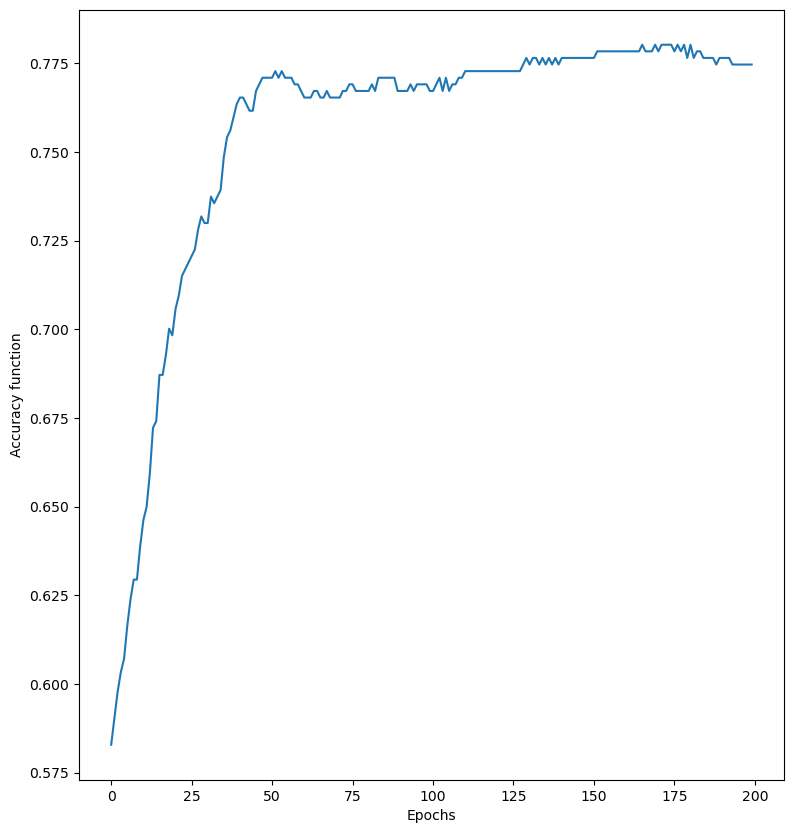

In [8]:
#Check accuracy
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Use model to predict probability and class
Y_pred = model.predict(X_test) #Probability terms
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #Class terms


8/8 [==============================] - 0s 412us/step


In [10]:
[v[0] for v in Y_pred]

[0.25126818,
 0.15083812,
 0.102904655,
 0.3130092,
 0.5278645,
 0.47486606,
 0.03444489,
 0.5712232,
 0.66153455,
 0.7137325,
 0.2308768,
 0.83604693,
 0.43458828,
 0.30848426,
 0.054964185,
 0.33767363,
 0.10318158,
 0.06184155,
 0.82519287,
 0.54680794,
 0.22472331,
 0.07532212,
 0.49062586,
 0.104061276,
 0.634146,
 0.8380419,
 0.07927486,
 0.040333387,
 0.26318994,
 0.117062226,
 0.8082974,
 0.7622315,
 0.7922478,
 0.78399163,
 0.47232103,
 0.7016425,
 0.9055556,
 0.24521138,
 0.53482425,
 0.5166184,
 0.05387053,
 0.45247447,
 0.45592976,
 0.36671996,
 0.044487767,
 0.61135197,
 0.6413188,
 0.1696074,
 0.47354475,
 0.94400686,
 0.037421398,
 0.74952275,
 0.8418368,
 0.3018062,
 0.19338234,
 0.041177638,
 0.7489882,
 0.038327962,
 0.41279283,
 0.78785783,
 0.69822025,
 0.3012255,
 0.44789606,
 0.27551678,
 0.11912832,
 0.5471762,
 0.04003203,
 0.7743314,
 0.06993108,
 0.6292176,
 0.76235765,
 0.059380878,
 0.22685221,
 0.10719485,
 0.08495344,
 0.4152185,
 0.24719739,
 0.1467463,
 

In [11]:
[v[0] for v in Y_prob]

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [12]:
#Performance metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #The bigger the better

#Train metrics
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#Test metrics
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 411us/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.777 	 0.715 	 0.601
  Test 	 0.766 	 0.676 	 0.625


**Multiclass example**

- Even tho outputs of neural nets are limited between 0 and 1, it's not guaranteed that the sum is 1
- Transform outputs so they can be used as probabilities cound help interpretability
- Softmax transformation

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [13]:
#Libraries
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [14]:
#Data
iris = datasets.load_iris()
X = iris.data
Y = iris.target #Tree flower types


In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#cChange output variable(y) so it can be used in the net
dummy_y = to_categorical(Y).astype(int)

In [18]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [19]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [20]:
#Net 

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#output

#Gradient descendent
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# Optmizer
model.compile(loss='categorical_crossentropy',#cost
              optimizer=sgd,
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 0s 69ms/step - loss: 2.9295 - accuracy: 0.3500 - val_loss: 1.1957 - val_accuracy: 0.7000
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 1.2580 - accuracy: 0.6583 - val_loss: 0.9557 - val_accuracy: 0.4000
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 0.9776 - accuracy: 0.4250 - val_loss: 0.8975 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 12ms/step - loss: 0.9641 - accuracy: 0.6583 - val_loss: 1.1021 - val_accuracy: 0.3333
Epoch 5/200
2/2 [==============================] - 0s 12ms/step - loss: 1.0852 - accuracy: 0.4083 - val_loss: 1.0478 - val_accuracy: 0.6333
Epoch 6/200
2/2 [==============================] - 0s 12ms/step - loss: 1.0199 - accuracy: 0.6333 - val_loss: 1.0226 - val_accuracy: 0.3667
Epoch 7/200
2/2 [==============================] - 0s 12ms/step - loss: 1.0001 - accuracy: 0.3500 - val_loss: 0.9334 - val_accuracy: 0.6333
Epoch 8/200
2/2 [===

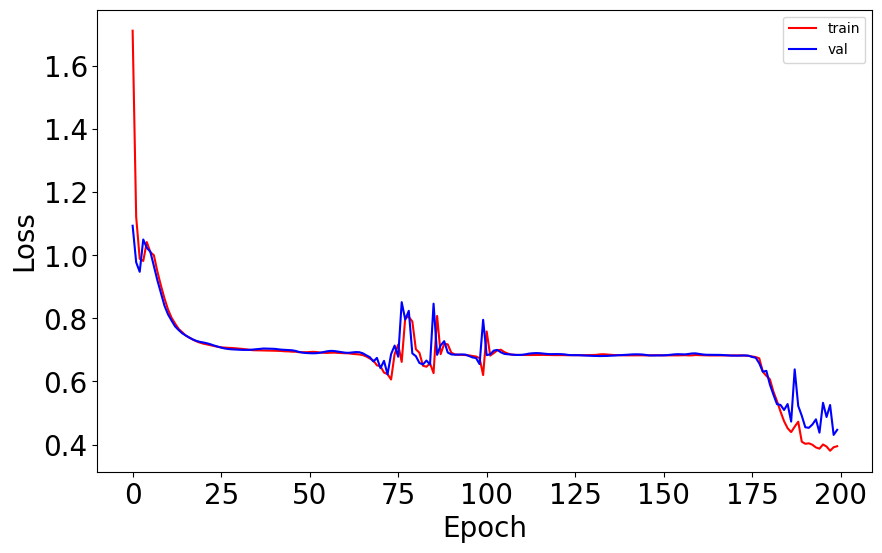

In [21]:
#Plot chart
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [22]:
#Predict with model
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 9ms/step


In [23]:
Y_pred

array([[3.1030282e-02, 8.7504762e-01, 9.3922041e-02],
       [9.9288756e-01, 7.1124868e-03, 5.4263740e-17],
       [1.5480485e-03, 1.3384306e-01, 8.6460882e-01],
       [3.2760758e-02, 8.8574207e-01, 8.1497163e-02],
       [3.5004295e-02, 8.9711595e-01, 6.7879766e-02],
       [9.8348147e-01, 1.6518505e-02, 2.8440834e-15],
       [1.4772072e-01, 8.5200363e-01, 2.7570003e-04],
       [2.1994880e-03, 1.7450753e-01, 8.2329297e-01],
       [1.5480485e-03, 1.3384306e-01, 8.6460882e-01],
       [8.4247701e-02, 9.1278917e-01, 2.9632244e-03],
       [6.9482080e-03, 4.0117019e-01, 5.9188157e-01],
       [9.6760309e-01, 3.2396860e-02, 6.9532711e-14],
       [9.9337244e-01, 6.6276067e-03, 3.8987021e-17],
       [9.7086227e-01, 2.9137772e-02, 4.1917658e-14],
       [9.9191499e-01, 8.0850106e-03, 9.8919757e-17],
       [6.0356759e-02, 9.2876536e-01, 1.0877919e-02],
       [1.5480485e-03, 1.3384306e-01, 8.6460882e-01],
       [5.6109913e-02, 9.2962420e-01, 1.4265926e-02],
       [2.6503300e-02, 8.373

In [24]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [25]:

#reverse engineering to get original y classes
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [26]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [27]:
#Performance metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#Train metrics
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#Test metrics
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

4/4 [==============================] - 0s 585us/step


1/1 [==============================] - 0s 16ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.983 	 0.984 	 0.983
  Test 	 0.967 	 0.969 	 0.967
